In [247]:
# Load modules
import matplotlib.pyplot as plt
import pickle
import numpy as np
import random
import cv2
import os
import re
from keras import layers
from keras import models
from keras import optimizers
from keras.applications import InceptionV3
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [47]:
target_size = 299 # For inception

In [227]:
def cropAndReshape(img):
    img_arr = np.asarray(img)
    # Cut lower part (Engine hood)
    remaining = 80
    img2=(img_arr[0:int(img_arr.shape[0]/2+remaining),
             0:img_arr.shape[1]]).copy()
    
    return cv2.resize(img2, (target_size, target_size))

In [228]:
green_light_training_dir_ros1 = os.path.join('ros_bag_1', 'Green')
red_light_training_dir_ros1 = os.path.join('ros_bag_1', 'Red')
yellow_light_training_dir_ros1 = os.path.join('ros_bag_1', 'Yellow')
no_light_training_dir_ros1 = os.path.join('ros_bag_1', 'No_Light')

green_light_training_dir_ros2 = os.path.join('ros_bag_2', 'Green')
red_light_training_dir_ros2 = os.path.join('ros_bag_2', 'Red')
yellow_light_training_dir_ros2 = os.path.join('ros_bag_2', 'Yellow')
no_light_training_dir_ros2 = os.path.join('ros_bag_2', 'No_Light')

In [229]:
x_ros12, predict_ros12 = ([],[])

green_light_training_data_ros1 = [cropAndReshape(load_img(os.path.join(green_light_training_dir_ros1, f))) for f in os.listdir(green_light_training_dir_ros1) if re.match(r'[0-9]+.*\.jpg', f)]
x_ros12.extend(green_light_training_data_ros1)
predict_ros12.extend([0] * len(green_light_training_data_ros1))

red_light_training_data_ros1 = [cropAndReshape(load_img(os.path.join(red_light_training_dir_ros1, f))) for f in os.listdir(red_light_training_dir_ros1) if re.match(r'[0-9]+.*\.jpg', f)]
x_ros12.extend(red_light_training_data_ros1)
predict_ros12.extend([1] * len(red_light_training_data_ros1))

yellow_light_training_data_ros1 = [cropAndReshape(load_img(os.path.join(yellow_light_training_dir_ros1, f))) for f in os.listdir(yellow_light_training_dir_ros1) if re.match(r'[0-9]+.*\.jpg', f)]
x_ros12.extend(yellow_light_training_data_ros1)
predict_ros12.extend([2] * len(yellow_light_training_data_ros1))

no_light_training_data_ros1 = [cropAndReshape(load_img(os.path.join(no_light_training_dir_ros1, f))) for f in os.listdir(no_light_training_dir_ros1) if re.match(r'[0-9]+.*\.jpg', f)]
x_ros12.extend(no_light_training_data_ros1)
predict_ros12.extend([3] * len(no_light_training_data_ros1))

green_light_training_data_ros2 = [cropAndReshape(load_img(os.path.join(green_light_training_dir_ros2, f))) for f in os.listdir(green_light_training_dir_ros2) if re.match(r'[0-9]+.*\.jpg', f)]
x_ros12.extend(green_light_training_data_ros2)
predict_ros12.extend([0] * len(green_light_training_data_ros2))

red_light_training_data_ros2 = [cropAndReshape(load_img(os.path.join(red_light_training_dir_ros2, f))) for f in os.listdir(red_light_training_dir_ros2) if re.match(r'[0-9]+.*\.jpg', f)]
x_ros12.extend(red_light_training_data_ros2)
predict_ros12.extend([1] * len(red_light_training_data_ros2))

yellow_light_training_data_ros2 = [cropAndReshape(load_img(os.path.join(yellow_light_training_dir_ros2, f))) for f in os.listdir(yellow_light_training_dir_ros2) if re.match(r'[0-9]+.*\.jpg', f)]
x_ros12.extend(yellow_light_training_data_ros2)
predict_ros12.extend([2] * len(yellow_light_training_data_ros2))

no_light_training_data_ros2 = [cropAndReshape(load_img(os.path.join(no_light_training_dir_ros2, f))) for f in os.listdir(no_light_training_dir_ros2) if re.match(r'[0-9]+.*\.jpg', f)]
x_ros12.extend(no_light_training_data_ros2)
predict_ros12.extend([3] * len(no_light_training_data_ros2))

print(np.shape(x_ros12))
y_ros12 = to_categorical(np.array(predict_ros12), 4)
print(np.shape(y_ros12))

(5882, 299, 299, 3)
(5882, 4)


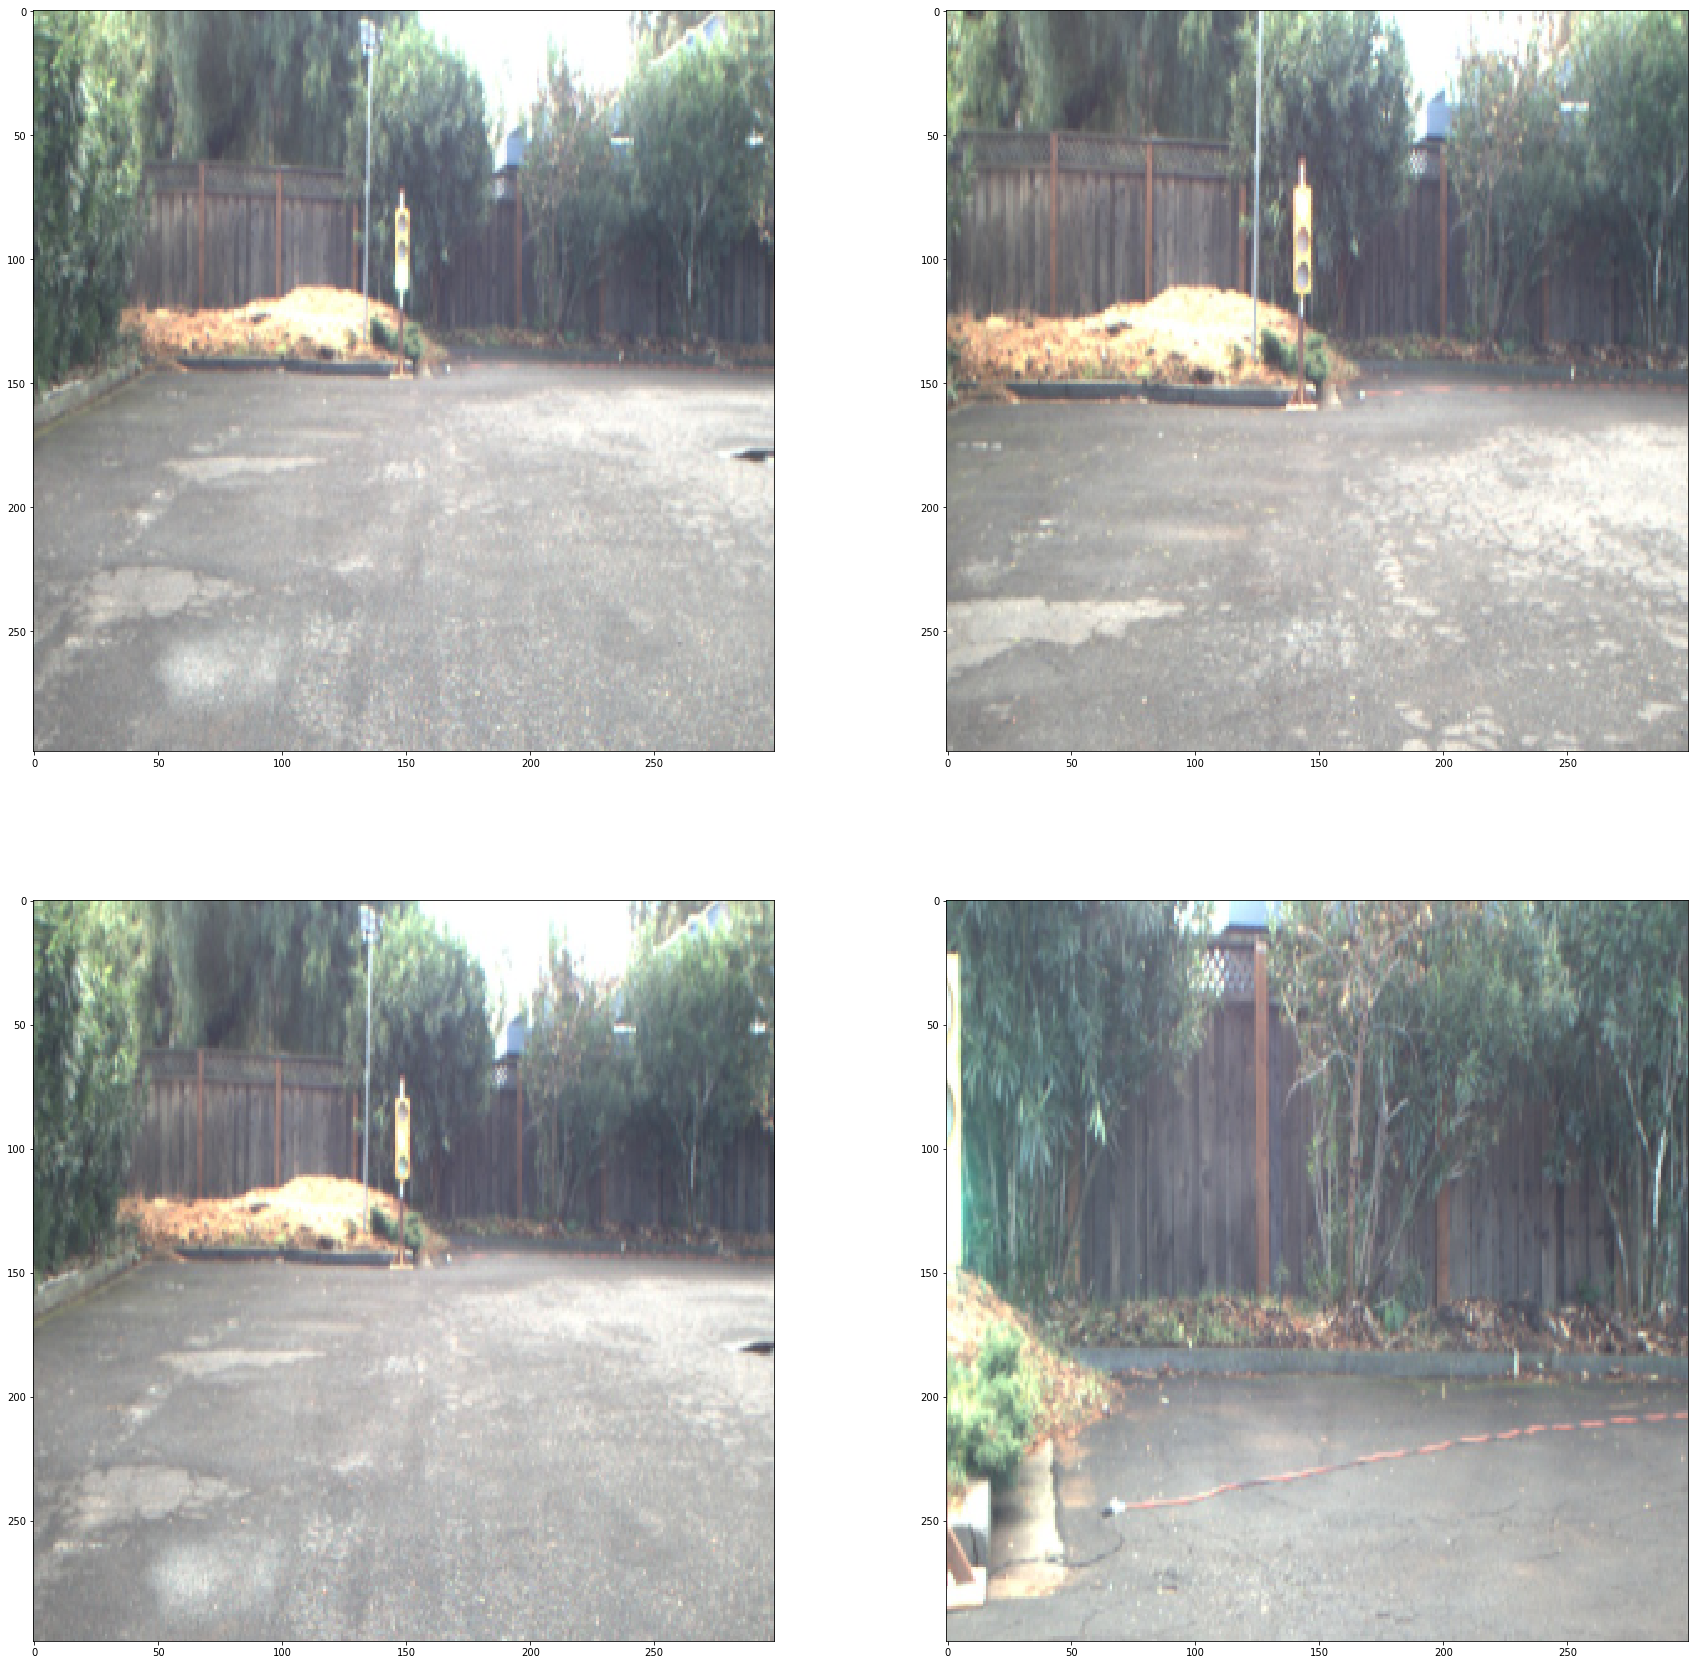

In [232]:
plt.figure(figsize=(30,30))
plt.subplot(2, 2, 1)
plt.imshow(green_light_training_data_ros1[0])
plt.subplot(2, 2, 2)
plt.imshow(red_light_training_data_ros1[0])
plt.subplot(2, 2, 3)
plt.imshow(yellow_light_training_data_ros1[0])
plt.subplot(2, 2, 4)
plt.imshow(no_light_training_data_ros1[0])
plt.show()

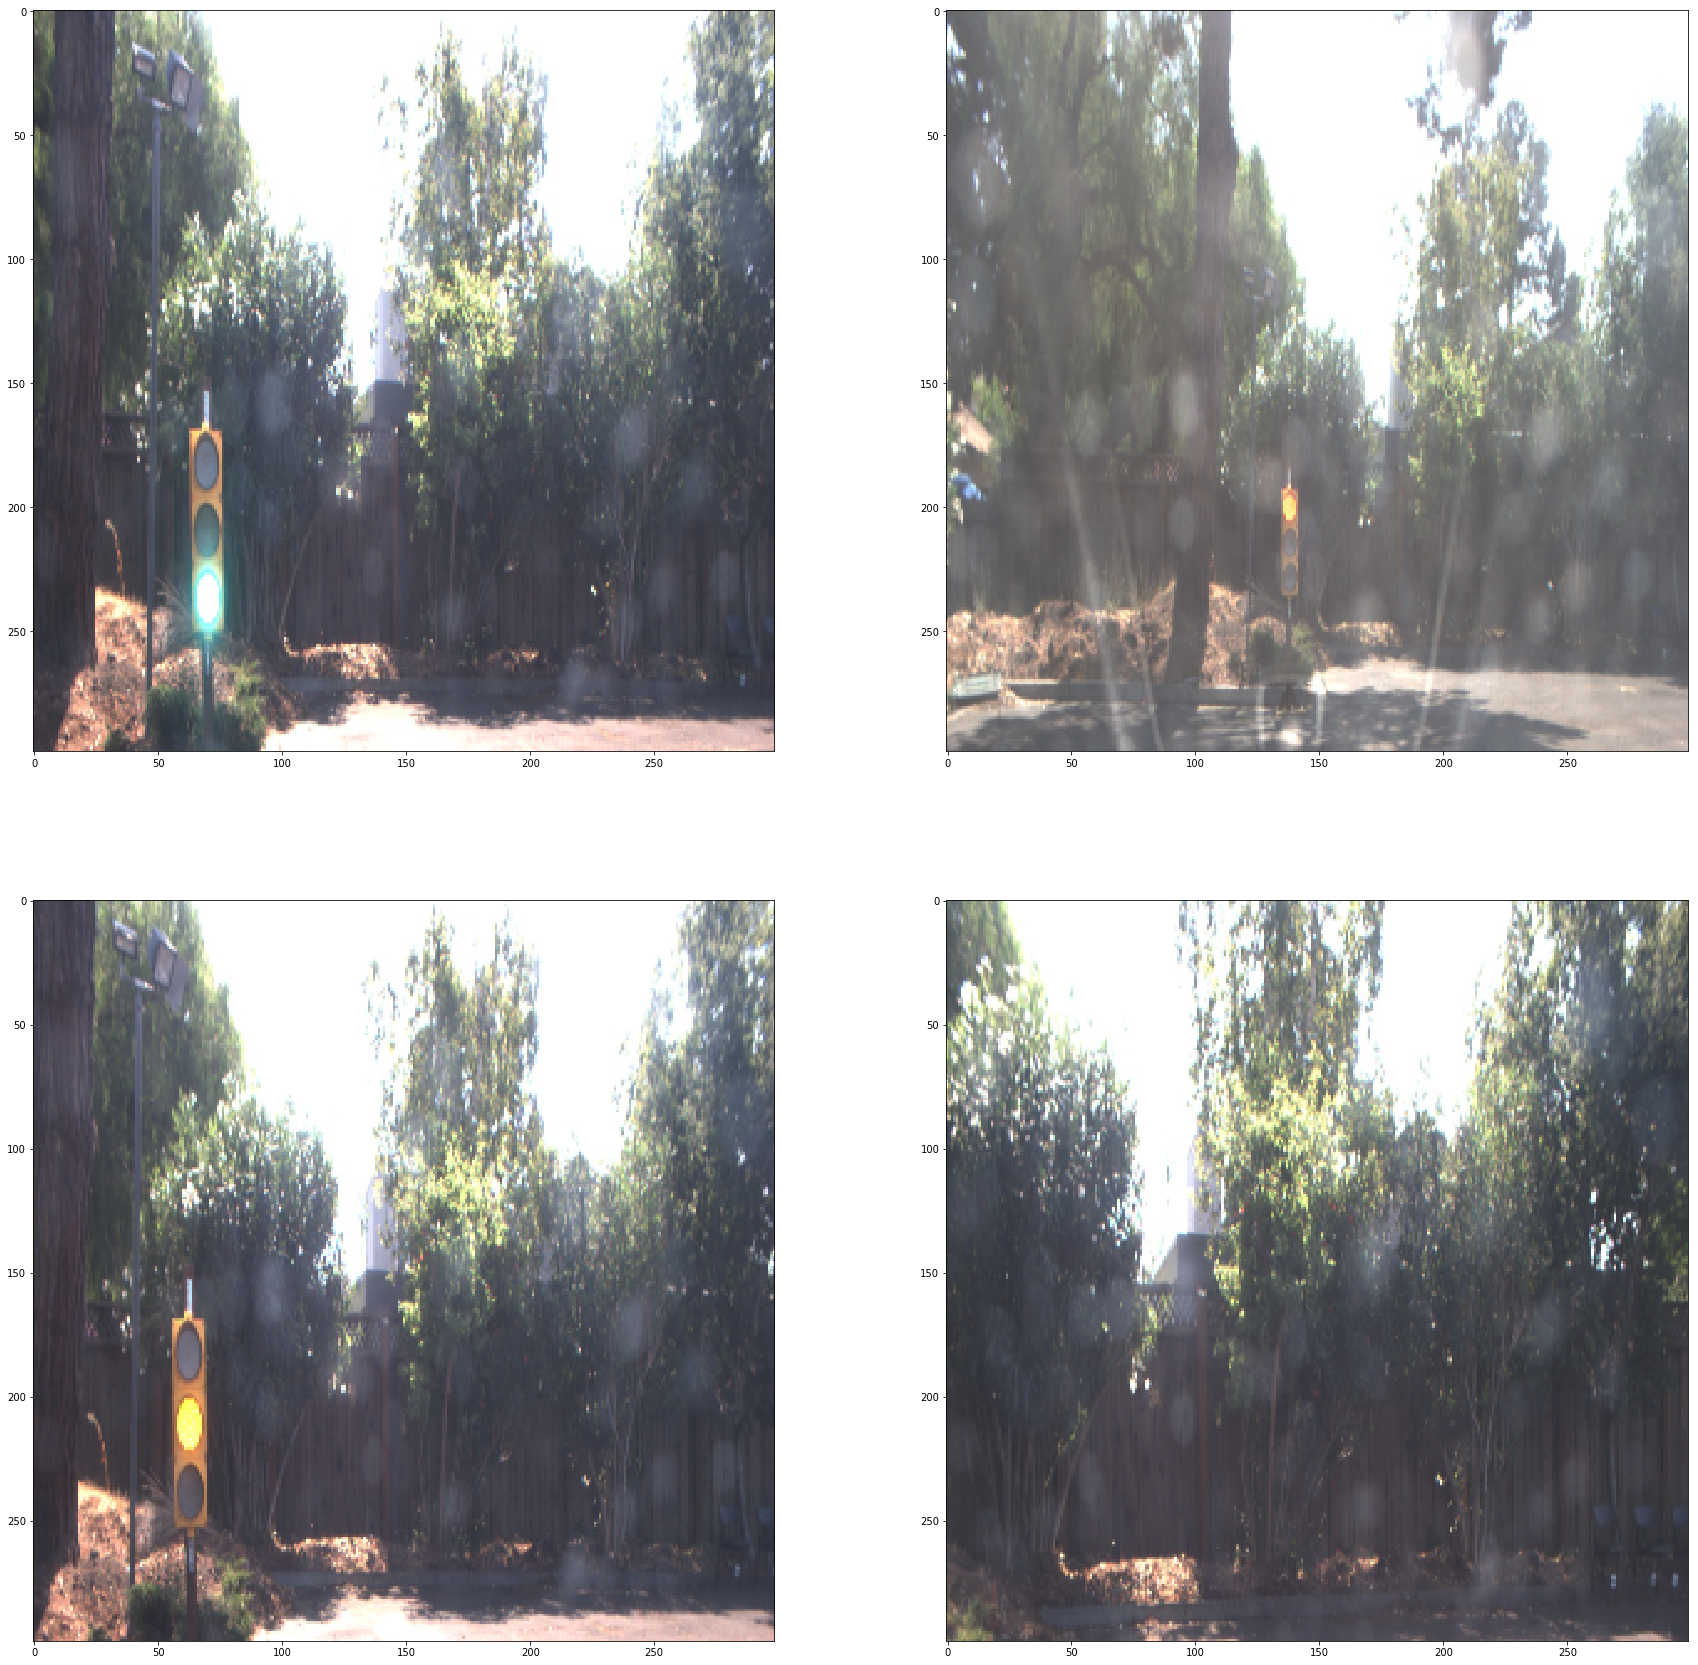

In [235]:
plt.figure(figsize=(30,30))
plt.subplot(2, 2, 1)
plt.imshow(green_light_training_data_ros2[10])
plt.subplot(2, 2, 2)
plt.imshow(red_light_training_data_ros2[10])
plt.subplot(2, 2, 3)
plt.imshow(yellow_light_training_data_ros2[10])
plt.subplot(2, 2, 4)
plt.imshow(no_light_training_data_ros2[10])
plt.show()

In [236]:
# Split image paths and category into training, validation and test sets
images_train12, images_test12, labels_train12, labels_test12 = train_test_split(x_ros12, y_ros12, test_size=0.05, random_state=42)
images_train12, images_valid12, labels_train12, labels_valid12 = train_test_split(images_train12, labels_train12, test_size=0.15, random_state=42)

print('Training data size:', np.shape(images_train12))
print('Validation data size:', np.shape(images_valid12))
print('Testing data size:', np.shape(images_test12))

print('Training label size:', np.shape(labels_train12))
print('Validation label size:', np.shape(labels_valid12))
print('Testing label size:', np.shape(labels_test12))

Training data size: (4748, 299, 299, 3)
Validation data size: (839, 299, 299, 3)
Testing data size: (295, 299, 299, 3)
Training label size: (4748, 4)
Validation label size: (839, 4)
Testing label size: (295, 4)


In [238]:
def data_generator12(images, labels, batch_size):
    x, predict = ([],[])
    images, labels = shuffle(images, labels)
    while True:
        for i in range(len(labels)):
            img = images[i]
            label = labels[i]
            x.append(img)
            predict.append(label)
            if len(x) == batch_size:
                yield (np.array(x), np.array(predict))
                x, predict = ([],[])
                images, labels = shuffle(images, labels)
            # Flip to enrich training data
            x.append(cv2.flip(img, 1))
            predict.append(label)
            if len(x) == batch_size:
                yield (np.array(x), np.array(predict))
                x, predict = ([],[])
                images, labels = shuffle(images, labels)

In [237]:
print(loaded_model.evaluate(np.array(images_test12), np.array(labels_test12), verbose=1))

295/295 [==============================] - 118s     
[3.0780824483451195, 0.80338983071052417]


In [239]:
model12 = models.Sequential()
model12.add(inception_base)
model12.add(layers.Flatten())
model12.add(layers.Dense(256, activation='relu'))
model12.add(layers.Dense(4, activation='softmax'))
model12.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
inception_v3 (Model)             (None, 8, 8, 2048)    21611968                                     
____________________________________________________________________________________________________
flatten_4 (Flatten)              (None, 131072)        0           mixed10[0][0]                    
____________________________________________________________________________________________________
dense_13 (Dense)                 (None, 256)           33554688    flatten_4[0][0]                  
____________________________________________________________________________________________________
dense_14 (Dense)                 (None, 4)             1028        dense_13[0][0]                   
Total params: 55,167,684
Trainable params: 55,133,444
Non-trainable params: 34,240
________

In [240]:
# Fine-tune model with very small learning rate
model12.compile(optimizer=optimizers.RMSprop(lr=2e-5),
            loss='categorical_crossentropy',
            metrics=['acc'])
generator12 = data_generator12(images_train12, labels_train12, 32)
validation_generator12 = data_generator12(images_valid12, labels_valid12, 32)
for inputs_batch, labels_batch in generator12:
    print(np.shape(inputs_batch))
    print(np.shape(labels_batch))
    print(np.shape(inputs_batch[0]))
    print(labels_batch[0])
    break;
for inputs_batch, labels_batch in validation_generator12:
    print(np.shape(inputs_batch))
    print(np.shape(labels_batch))
    print(np.shape(inputs_batch[0]))
    print(labels_batch[0])
    break;

(32, 299, 299, 3)
(32, 4)
(299, 299, 3)
[ 0.  1.  0.  0.]
(32, 299, 299, 3)
(32, 4)
(299, 299, 3)
[ 0.  1.  0.  0.]


In [241]:
history = model12.fit_generator(generator12, 
                              validation_data = validation_generator12,
                              samples_per_epoch=1600,
                              nb_val_samples=320,
                              nb_epoch=10,
                              verbose=1)     

Epoch 1/10
1600/1600 [==============================] - 2092s - loss: 0.6700 - acc: 0.8450 - val_loss: 1.5689 - val_acc: 0.7969

In [242]:
model12_file = 'inceptionv3_based_ros12_trained.h5'
model12_weight_file = 'inceptionv3_based_ros12_trained_weights.h5'
model12.save(model12_file)
model12.save_weights(model12_weight_file)

In [243]:
print(model12.evaluate(np.array(images_test12), np.array(labels_test12), verbose=1))

295/295 [==============================] - 108s    
[0.073919118352454988, 0.98983050847457632]


In [249]:
print(model12_file)
model12_loaded = load_model(model12_file)
model12_loaded.summary()

inceptionv3_based_ros12_trained.h5
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
inception_v3 (Model)             (None, 8, 8, 2048)    21611968                                     
____________________________________________________________________________________________________
flatten_4 (Flatten)              (None, 131072)        0           mixed10[0][0]                    
____________________________________________________________________________________________________
dense_13 (Dense)                 (None, 256)           33554688    flatten_4[0][0]                  
____________________________________________________________________________________________________
dense_14 (Dense)                 (None, 4)             1028        dense_13[0][0]                   
Total params: 55,167,684
Trainable params: 55,133,444
No

In [250]:
print(model12_loaded.evaluate(np.array(images_test12), np.array(labels_test12), verbose=1))

295/295 [==============================] - 158s     
[0.073919118352454988, 0.98983050847457632]


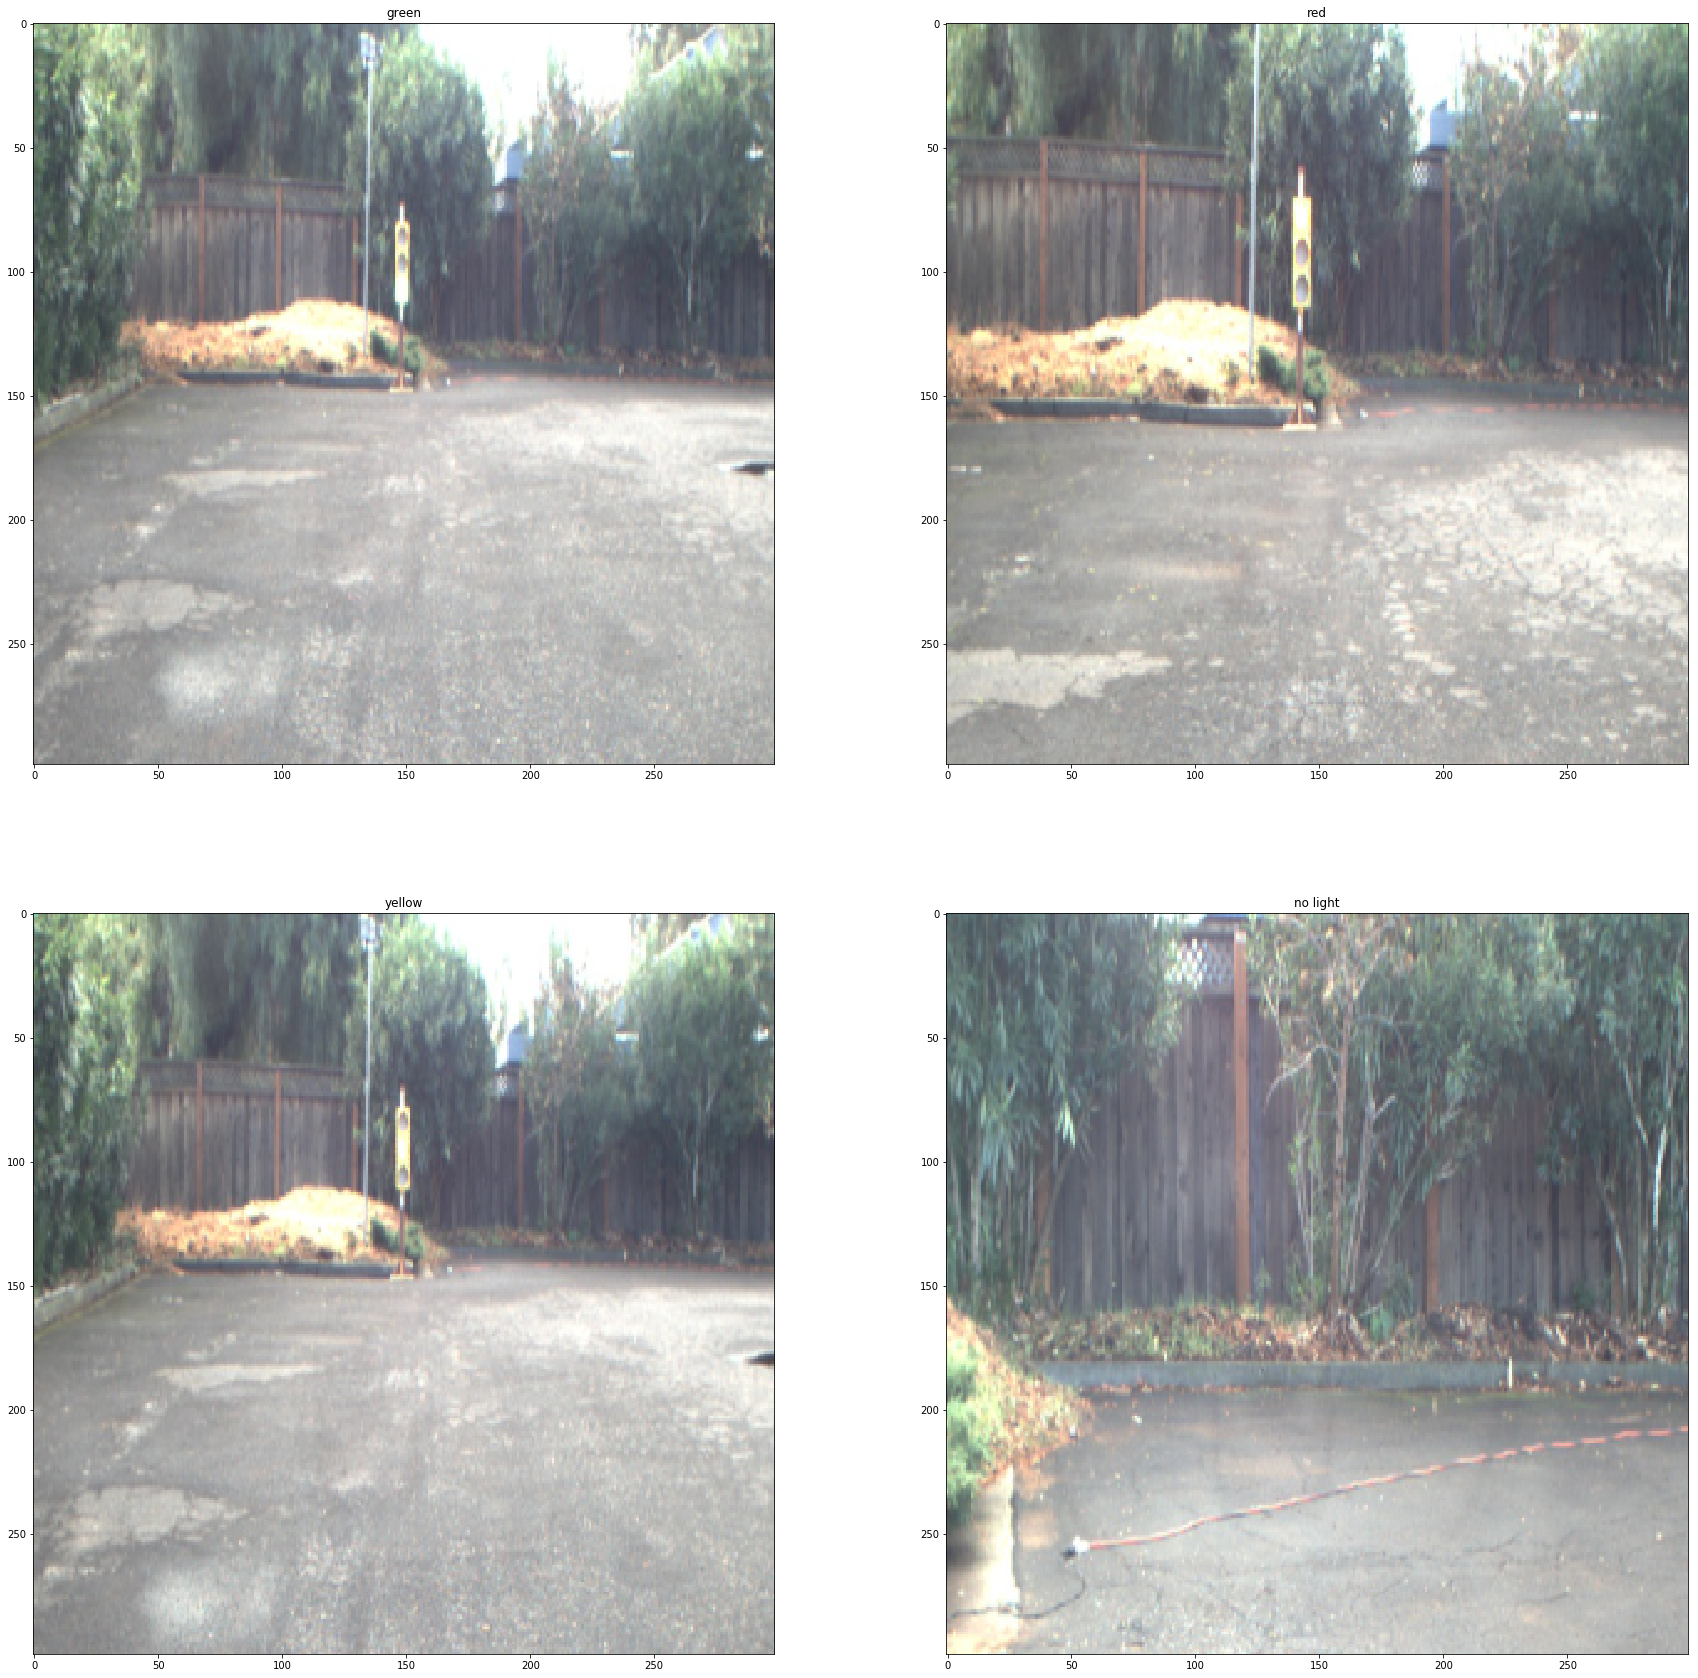

In [255]:
predicted = ['green', 'red', 'yellow', 'no light']
state = model12_loaded.predict(np.expand_dims(green_light_training_data_ros1[10], axis=0))
idx = np.argmax(state)
plt.figure(figsize=(30,30))
plt.subplot(2, 2, 1)
plt.title(predicted[idx])
plt.imshow(green_light_training_data_ros1[10])


state = model12_loaded.predict(np.expand_dims(red_light_training_data_ros1[10], axis=0))
idx = np.argmax(state)
plt.subplot(2, 2, 2)
plt.title(predicted[idx])
plt.imshow(red_light_training_data_ros1[10])


state = model12_loaded.predict(np.expand_dims(yellow_light_training_data_ros1[10], axis=0))
idx = np.argmax(state)
plt.subplot(2, 2, 3)
plt.title(predicted[idx])
plt.imshow(yellow_light_training_data_ros1[10])


state = model12_loaded.predict(np.expand_dims(no_light_training_data_ros1[10], axis=0))
idx = np.argmax(state)
plt.subplot(2, 2, 4)
plt.title(predicted[idx])
plt.imshow(no_light_training_data_ros1[10])

plt.show()

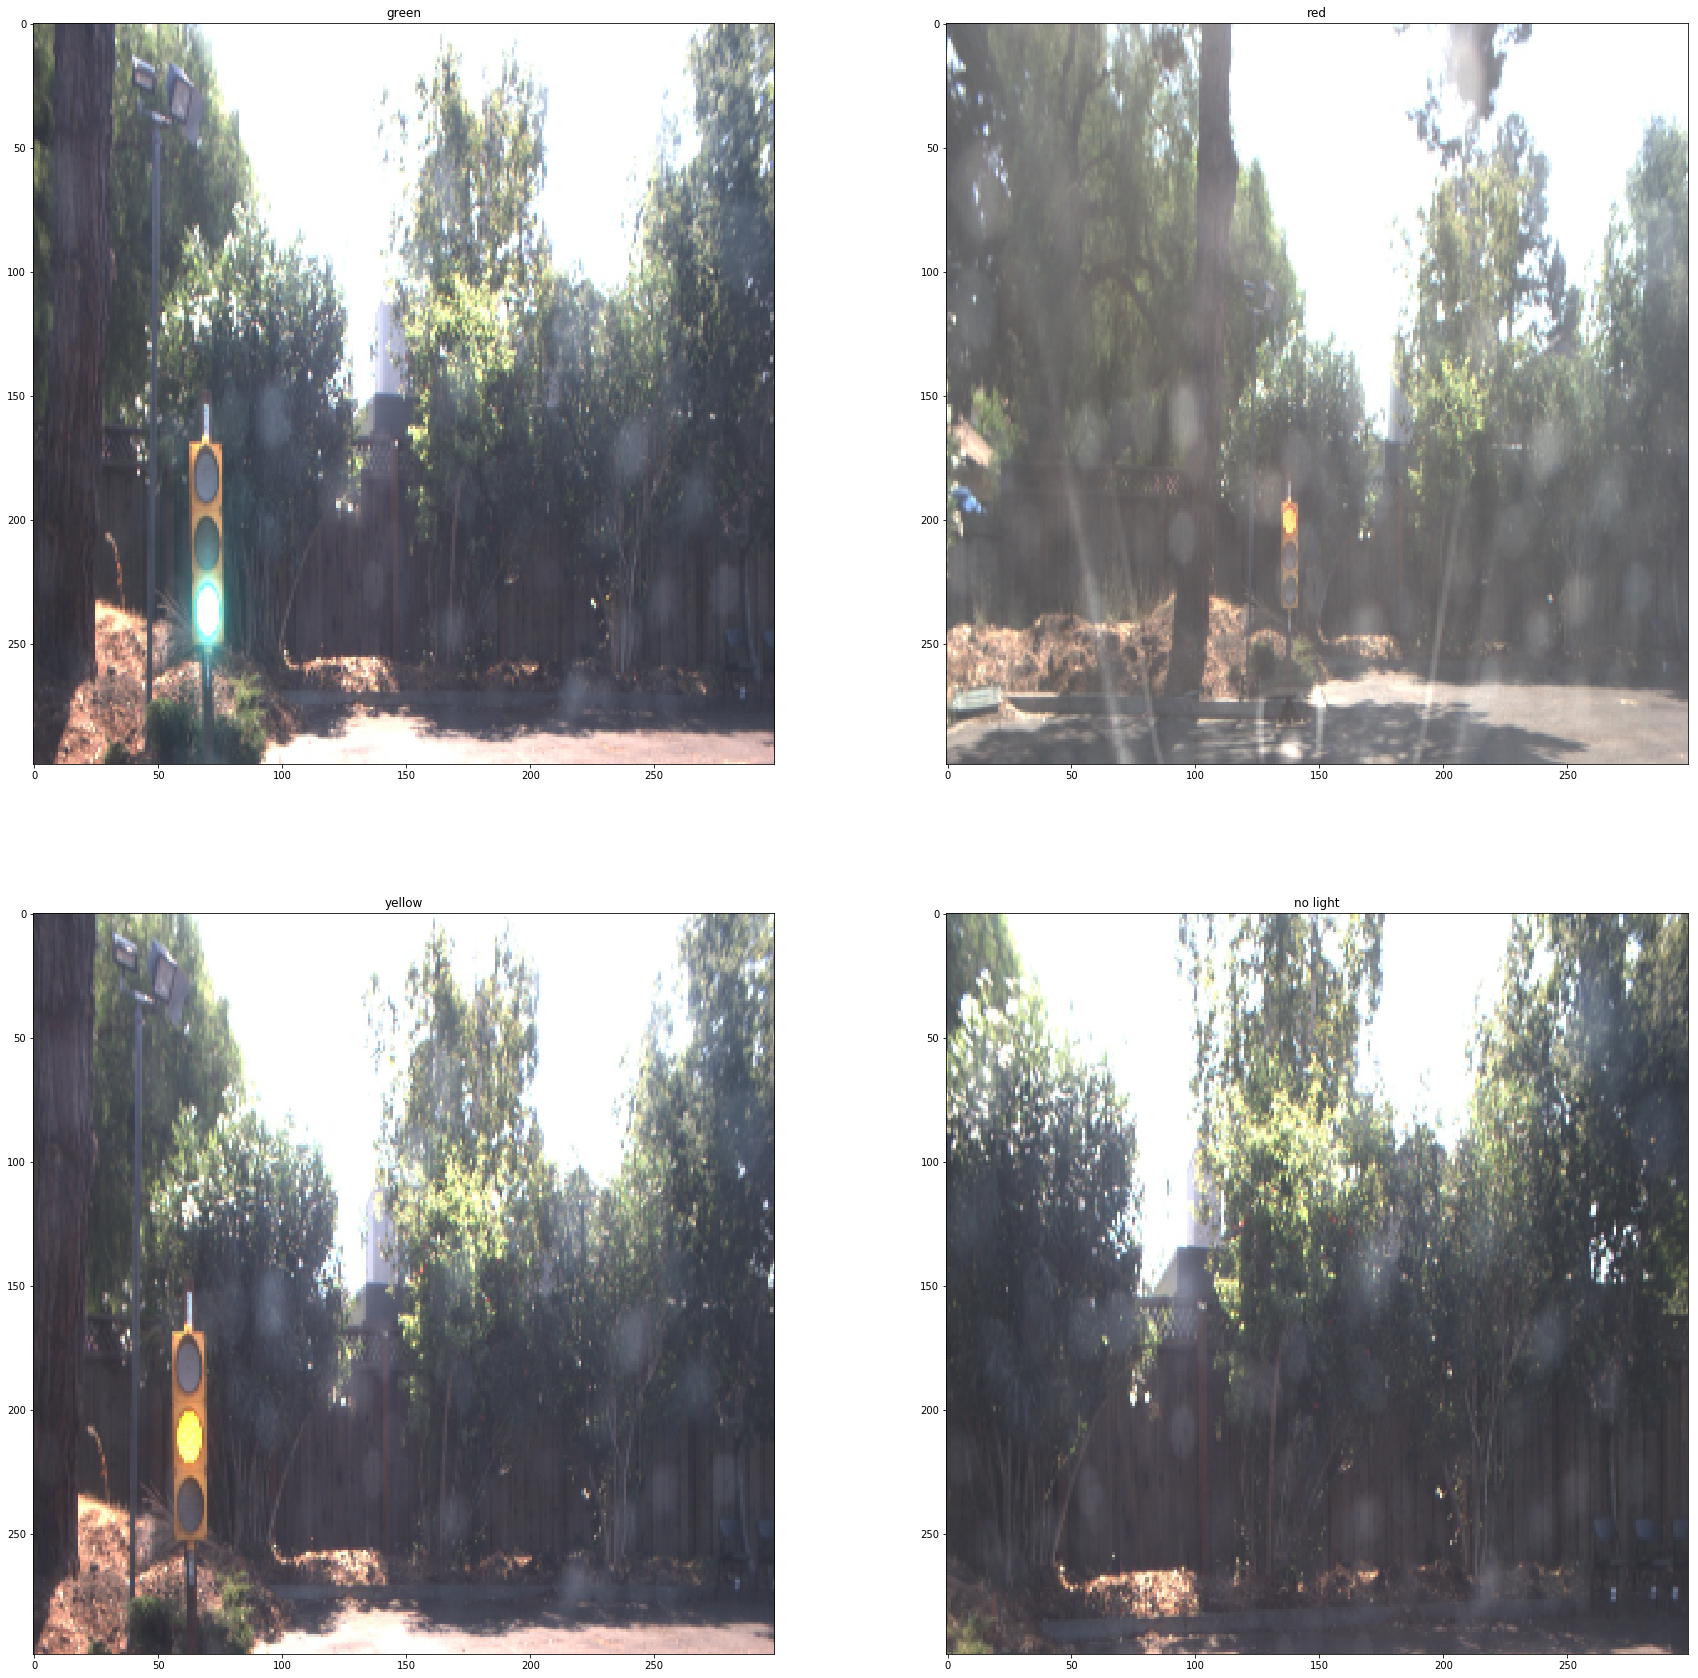

In [256]:
state = model12_loaded.predict(np.expand_dims(green_light_training_data_ros2[10], axis=0))
idx = np.argmax(state)
plt.figure(figsize=(30,30))
plt.subplot(2, 2, 1)
plt.title(predicted[idx])
plt.imshow(green_light_training_data_ros2[10])


state = model12_loaded.predict(np.expand_dims(red_light_training_data_ros2[10], axis=0))
idx = np.argmax(state)
plt.subplot(2, 2, 2)
plt.title(predicted[idx])
plt.imshow(red_light_training_data_ros2[10])


state = model12_loaded.predict(np.expand_dims(yellow_light_training_data_ros2[10], axis=0))
idx = np.argmax(state)
plt.subplot(2, 2, 3)
plt.title(predicted[idx])
plt.imshow(yellow_light_training_data_ros2[10])


state = model12_loaded.predict(np.expand_dims(no_light_training_data_ros2[10], axis=0))
idx = np.argmax(state)
plt.subplot(2, 2, 4)
plt.title(predicted[idx])
plt.imshow(no_light_training_data_ros2[10])

plt.show()